In [1]:
import sys

from pathlib import Path
from datetime import timedelta

import dateutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras
import seaborn as sns


Using TensorFlow backend.


In [2]:
np.random.seed(777)

In [3]:
df=pd.read_csv('d_final_mehico.csv')
# df.head()
len(df)

121395

In [4]:
# featrues:x; 정규화할 변수
features= df.loc[:, ['sex', 'intubed','pneumonia','age_grp','pregnancy', 'diabetes', 
                 'copd', 'asthma','inmsupr','hypertension','other_disease',
                 'cardiovascular','obesity', 'renal_chronic', 'tobacco', 
                 'contact_other_covid', 'covid_res', 'icu']]

# label: y; 종속변수; 정규화x
label = df.loc[:, ['DEATH']]

In [5]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
feature_n = MinMaxScaler(feature_range=(0,1)).fit_transform(features)
feature_n

array([[0. , 0.5, 0.5, ..., 1. , 0. , 0.5],
       [1. , 0.5, 0. , ..., 1. , 0. , 0.5],
       [0. , 0.5, 0.5, ..., 1. , 0. , 0.5],
       ...,
       [1. , 0. , 0. , ..., 0.5, 1. , 0. ],
       [0. , 0.5, 0. , ..., 1. , 1. , 0.5],
       [0. , 0.5, 0. , ..., 1. , 1. , 0.5]])

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import mglearn

In [7]:
# Train, Test dataset 분리
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1004)

In [8]:
print(x_train.shape[:], y_train.shape[:], x_test.shape[:], y_test.shape[:])

(97116, 18) (97116, 1) (24279, 18) (24279, 1)


In [9]:
forest = RandomForestClassifier(n_estimators=100,random_state=1004)
forest.fit(x_train,y_train)
#forest.fit(x_train,y_train).decision_function(x_test)

# 정확도 구하기
print("훈련 세트 정확도 : {:.3f}".format(forest.score(x_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(x_test,y_test)))

C:\Users\tjoeun\.conda\envs\env_cpu\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


훈련 세트 정확도 : 0.807
테스트 세트 정확도 : 0.759


In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [23]:
pred = forest.predict(x_test)

In [24]:
probs=forest.predict_proba(x_test)

In [25]:
probs = probs[:,1] 

In [26]:
# ROC 그래프
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, accuracy_score, auc

In [27]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Classification - Random Forest Model')
    plt.legend()
    plt.show()

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

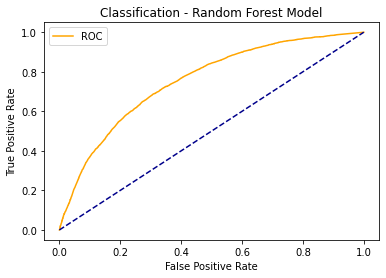

In [29]:
plot_roc_curve(fpr,tpr)

In [30]:
# AUC 구하기
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.75


In [31]:
Y_test1 = y_test.loc[:, "DEATH"] # True 값

In [32]:
# accuracy, recall, f1_score
print('accuracy : %.3f' % accuracy_score(y_true = Y_test1, y_pred=pred))
print('recall : %.3f' % recall_score(y_true = Y_test1, y_pred=pred))
print('f1_score : %.3f' % f1_score(y_true = Y_test1, y_pred=pred))

accuracy : 0.759
recall : 0.361
f1_score : 0.445


특성 중요도 : 
[0.03639402 0.11825571 0.07608264 0.16421982 0.00421848 0.03778079
 0.02672764 0.01687594 0.02554882 0.03841151 0.03146484 0.03117101
 0.04358691 0.02683756 0.03498679 0.10995495 0.14818969 0.02929287]


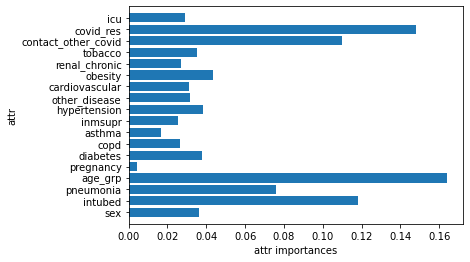

In [35]:
# 특성 중요도

print("특성 중요도 : \n{}".format(forest.feature_importances_))

# 특성 중요도 시각화 하기

def plot_feature_importances_df(model):
    n_features = features.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
plt.show()

plot_feature_importances_df(forest)